In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,aaronconnolly,2019,13,161,1312.0,24,28,2148.0,41,2000-01-28,...,NaN,NaN,NaN,NaN,24.613627,2.5,2.0,NaN,NaN,NaN
1,aaronconnolly,2020,71,161,836.0,17,28,2148.0,41,2000-01-28,...,24.0,54.666667,13.0,24.0,24.613627,2.5,2.0,0.0,161.0,13.0
2,aaroncresswell,2016,95,226,2247.0,26,27,13368.0,149,1989-12-15,...,NaN,NaN,NaN,NaN,22.396079,3.5,1.0,NaN,NaN,NaN
3,aaroncresswell,2018,87,226,1680.0,20,27,13368.0,149,1989-12-15,...,26.0,86.423077,95.0,26.0,22.396079,3.5,1.0,0.0,226.0,95.0
4,aaroncresswell,2019,35,226,2870.0,31,31,13368.0,149,1989-12-15,...,46.0,85.369565,91.0,23.0,22.396079,3.5,1.0,0.0,452.0,87.0


In [4]:
df.iloc[4]

p_id2                                aaroncresswell
start_year                                     2019
season_days_injured                              35
total_days_injured                              226
season_minutes_played                        2870.0
season_games_played                              31
season_matches_in_squad                          31
total_minutes_played                        13368.0
total_games_played                              149
dob                                      1989-12-15
height_cm                                171.666667
weight_kg                                      66.0
nationality                                 England
work_rate                               High/Medium
pace                                      74.333333
physic                                         67.0
fifa_rating                               75.333333
position                                   Defender
age                                              30
cumulative_m

In [5]:
df.loc[4,'work_rate']

'High/Medium'

In [6]:
df.shape

(1301, 30)

In [7]:
df.columns

Index(['p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
       'season_minutes_played', 'season_games_played',
       'season_matches_in_squad', 'total_minutes_played', 'total_games_played',
       'dob', 'height_cm', 'weight_kg', 'nationality', 'work_rate', 'pace',
       'physic', 'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
       'cumulative_games_played', 'minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
       'bmi', 'work_rate_numeric', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season'],
      dtype='object')

In [8]:
df.position.unique()

array(['Forward', 'Defender', 'Midfielder', 'Goalkeeper', nan],
      dtype=object)

In [9]:
df.isnull().sum()

p_id2                                  0
start_year                             0
season_days_injured                    0
total_days_injured                     0
season_minutes_played                  0
season_games_played                    0
season_matches_in_squad                0
total_minutes_played                   0
total_games_played                     0
dob                                    0
height_cm                              0
weight_kg                              0
nationality                            0
work_rate                              0
pace                                  95
physic                                95
fifa_rating                            0
position                               2
age                                    0
cumulative_minutes_played            604
cumulative_games_played              604
minutes_per_game_prev_seasons        616
avg_days_injured_prev_seasons        604
avg_games_per_season_prev_seasons    604
bmi             

# analysis

In [10]:
'''

physical_features = ['p_id2', 'start_year', 'position', 'age',
                     'bmi', 'height_cm', 'weight_kg', 'work_rate_numeric' ,'pace', 'physic',
                     'work_rate', 'position_numeric' ,'season_days_injured']

season_features = ['p_id2', 'start_year', 'cumulative_minutes_played','cumulative_games_played',
                   'minutes_per_game_prev_seasons','avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons', 
                  'significant_injury_prev_season', 'cumulative_days_injured','season_days_injured_prev_season',
                   'season_days_injured']

df_physical = df[physical_features]
df_season = df[season_features]



df_season.head()
'''

"\n\nphysical_features = ['p_id2', 'start_year', 'position', 'age',\n                     'bmi', 'height_cm', 'weight_kg', 'work_rate_numeric' ,'pace', 'physic',\n                     'work_rate', 'position_numeric' ,'season_days_injured']\n\nseason_features = ['p_id2', 'start_year', 'cumulative_minutes_played','cumulative_games_played',\n                   'minutes_per_game_prev_seasons','avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons', \n                  'significant_injury_prev_season', 'cumulative_days_injured','season_days_injured_prev_season',\n                   'season_days_injured']\n\ndf_physical = df[physical_features]\ndf_season = df[season_features]\n\n\n\ndf_season.head()\n"

ploting histogram for all the columns

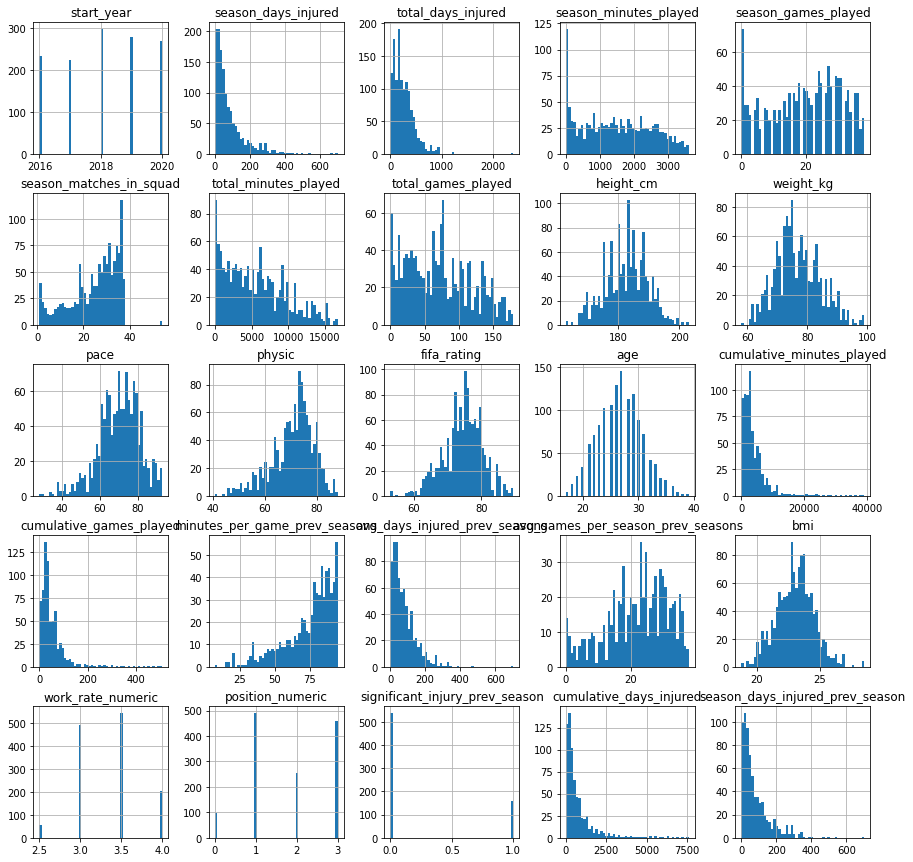

In [11]:
_ = df[df.columns].hist(bins=50, figsize=(15, 15)) 

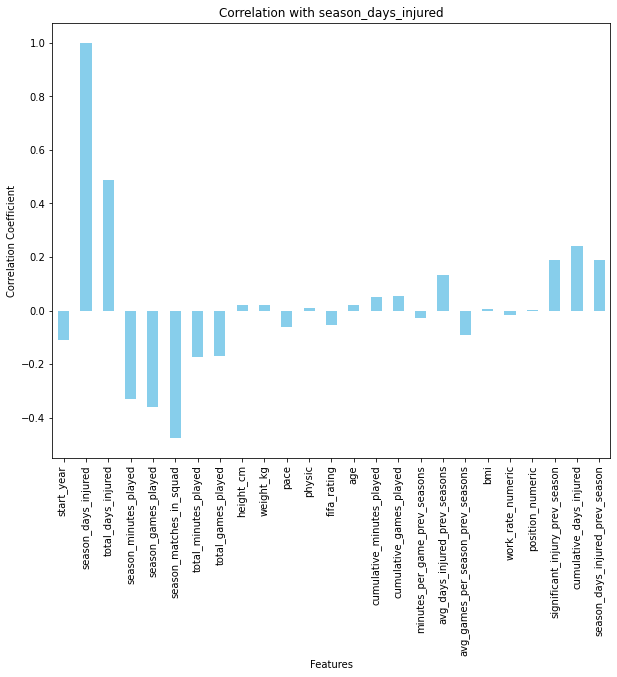

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(df)


selected_feature = 'season_days_injured'


correlations = df.corrwith(df[selected_feature])


plt.figure(figsize=(10, 8))
correlations.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {selected_feature}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

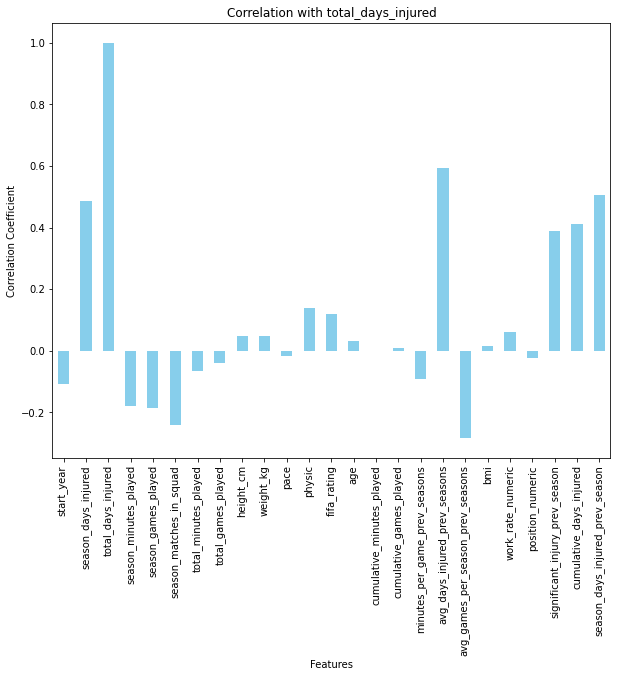

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(df)


selected_feature = 'total_days_injured'


correlations = df.corrwith(df[selected_feature])


plt.figure(figsize=(10,8))
correlations.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {selected_feature}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

to check the injury for prev sension

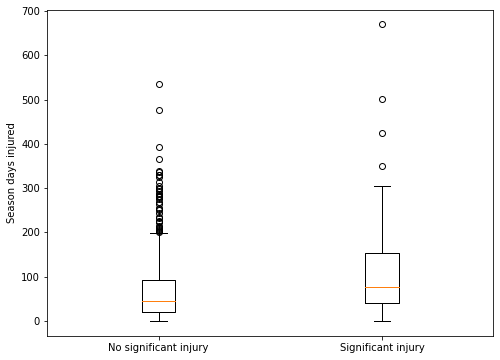

In [14]:
import matplotlib.pyplot as plt

df_nonulls = df.dropna()

plt.figure(figsize=(8, 6))
plt.boxplot([df_nonulls.loc[df_nonulls['significant_injury_prev_season'] == 0, 'season_days_injured'], 
             df_nonulls.loc[df_nonulls['significant_injury_prev_season'] == 1, 'season_days_injured']])
plt.xticks([1, 2], ['No significant injury', 'Significant injury'])
plt.ylabel('Season days injured')
plt.show()

to check season days injured by position

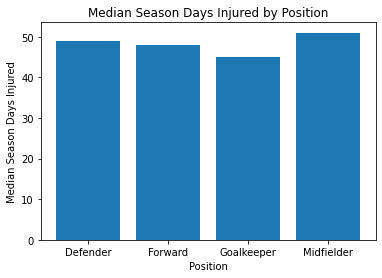

In [15]:

import matplotlib.pyplot as plt

grouped = df.groupby('position')['season_days_injured'].median()

plt.bar(grouped.index, grouped.values)
plt.title('Median Season Days Injured by Position')
plt.xlabel('Position')
plt.ylabel('Median Season Days Injured')
plt.show()

In [16]:
#injury threshold
injury_threshold = 120
df['target_major_injury'] = (df['season_days_injured'] > injury_threshold).astype('category')

In [17]:
df['target_major_injury'].value_counts()

False    1029
True      272
Name: target_major_injury, dtype: int64

# to check the outliers in each col

function to plot box plot

In [18]:
#Box plot function
def plot_features_vs_target_boxplot(df, x_features, y_feature):
    df_nonulls = df.dropna()

    # Generate box plots for each numerical column against the target feature
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(x_features, 1):
        plt.subplot(3, 3, i)
        df_nonulls.boxplot(column=[column], by=y_feature, ax=plt.gca())
        plt.title(column)

    plt.tight_layout()
    plt.show() 


box plot of physical features

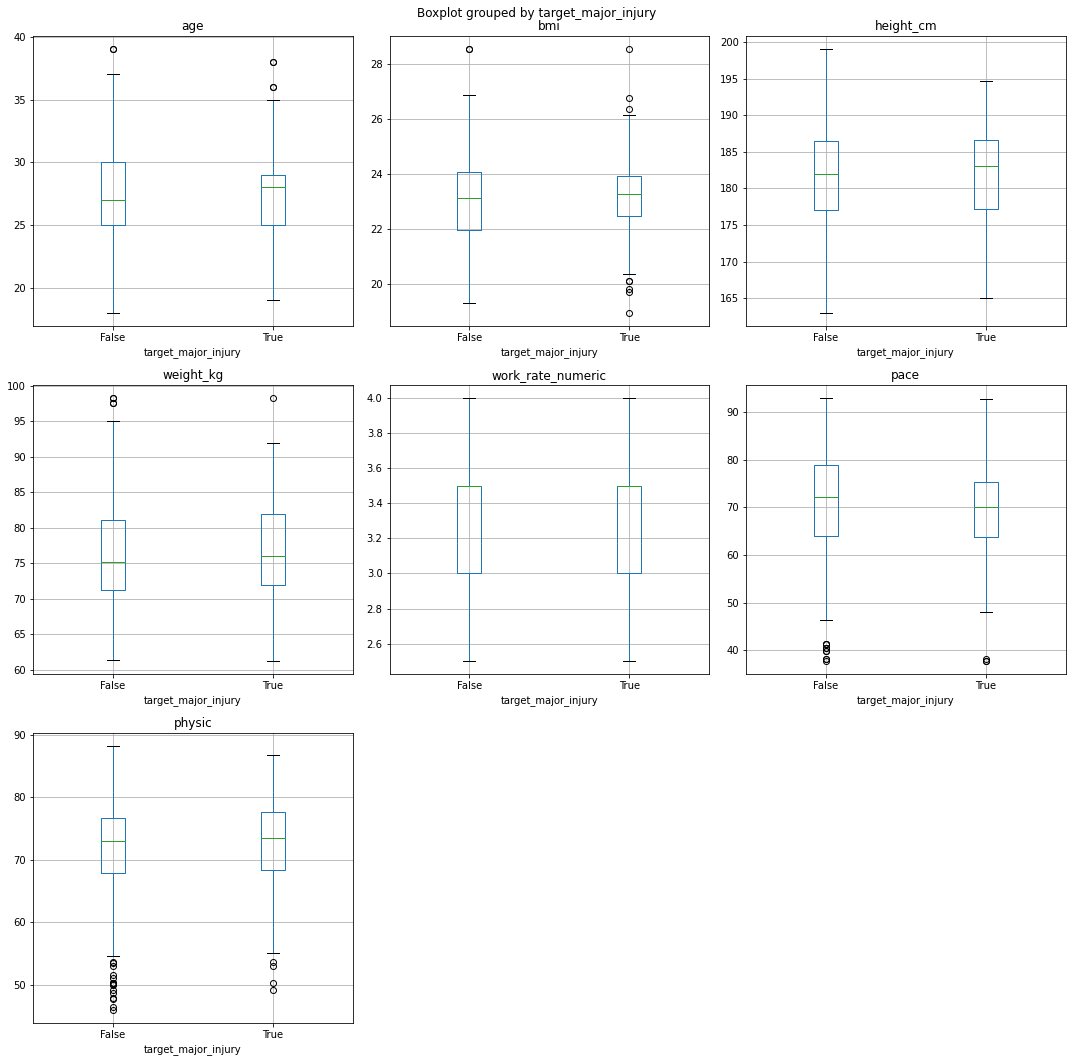

In [19]:
physical_features = ['age','bmi', 'height_cm', 'weight_kg', 'work_rate_numeric' ,'pace', 'physic']

plot_features_vs_target_boxplot(df, physical_features, 'target_major_injury')

box plot of other features

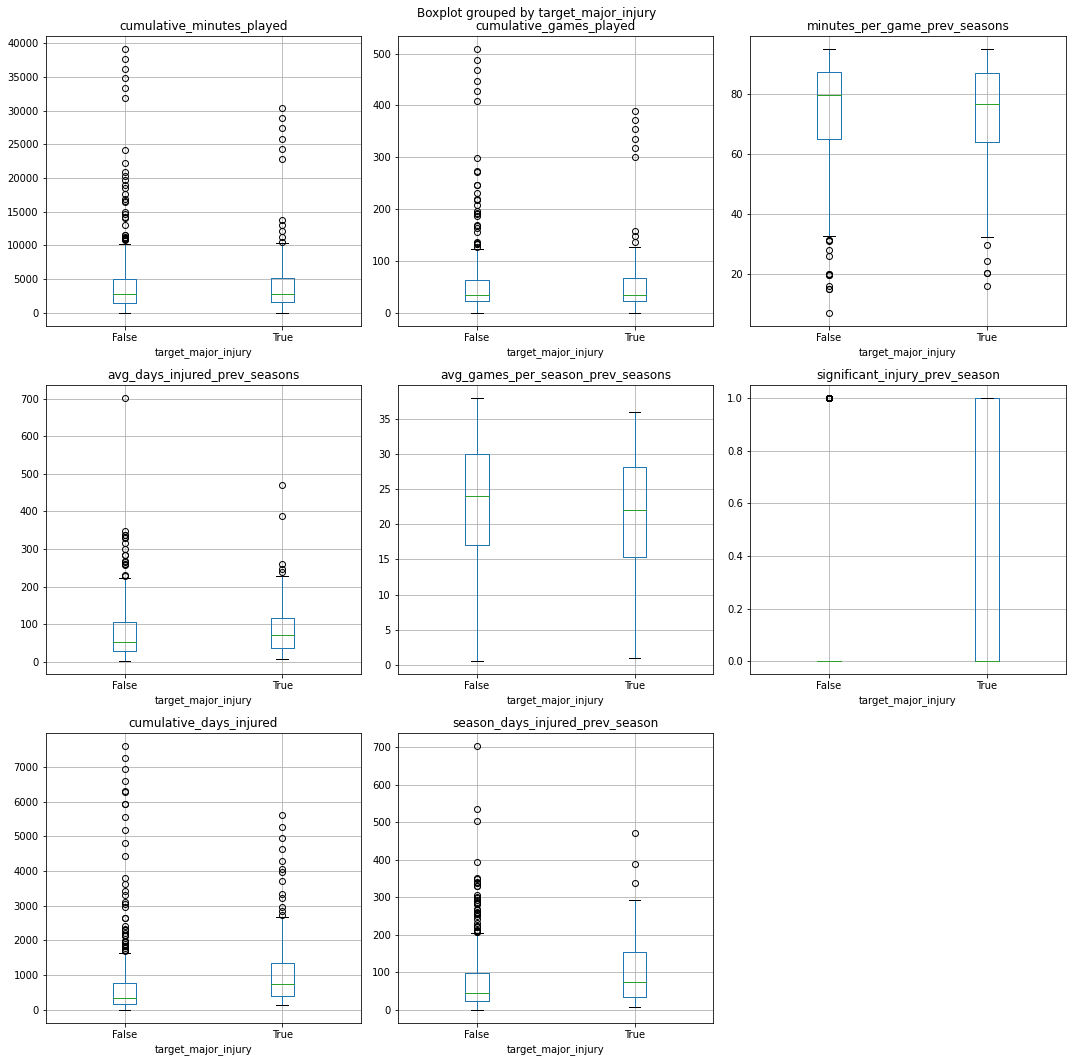

In [20]:
season_features = ['cumulative_minutes_played','cumulative_games_played',
                   'minutes_per_game_prev_seasons','avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons', 
                  'significant_injury_prev_season', 'cumulative_days_injured','season_days_injured_prev_season']

plot_features_vs_target_boxplot(df, season_features, 'target_major_injury')

# removing null values

to drop null values

In [21]:
#Drop nulls in key columns
cols_to_drop_nulls = [
    'cumulative_minutes_played', 'minutes_per_game_prev_seasons',
    'avg_days_injured_prev_seasons', 'significant_injury_prev_season',
    'cumulative_days_injured'
]

df = df.dropna(subset=cols_to_drop_nulls)

drop null values using imputer

In [22]:
#Impute other nulls with mean 
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df[['pace', 'physic']] = mean_imputer.fit_transform(df[['pace', 'physic']])

#Impute other nulls with most frequent

mode_imputer = SimpleImputer(strategy='most_frequent')
df['position_numeric'] = mode_imputer.fit_transform(df['position_numeric'].values.reshape(-1, 1))

# feature selection

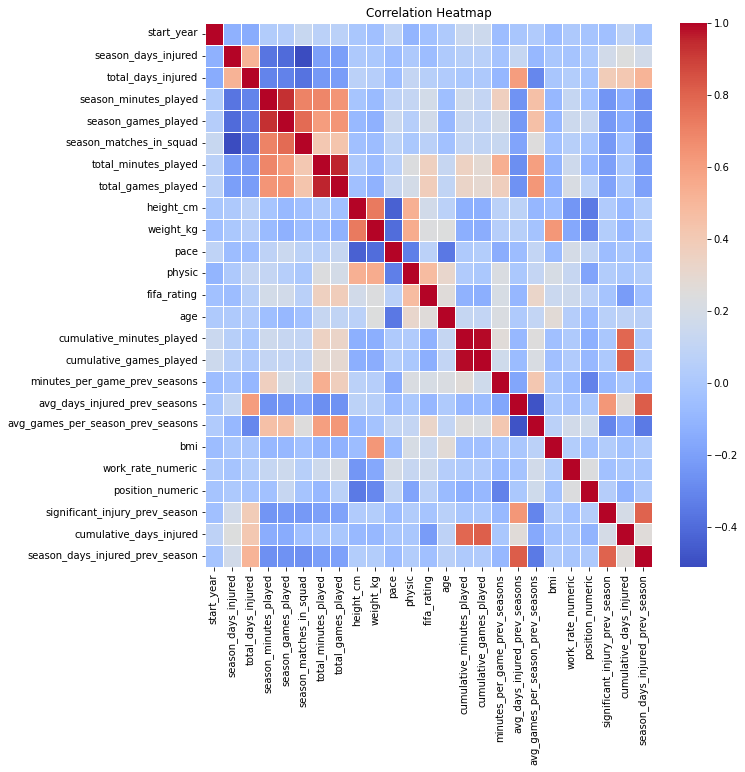

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.head()

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season,target_major_injury
1,aaronconnolly,2020,71,161,836.0,17,28,2148.0,41,2000-01-28,...,54.666667,13.000000,24.000000,24.613627,2.5,2.0,0.0,161.0,13.0,False
3,aaroncresswell,2018,87,226,1680.0,20,27,13368.0,149,1989-12-15,...,86.423077,95.000000,26.000000,22.396079,3.5,1.0,0.0,226.0,95.0,False
4,aaroncresswell,2019,35,226,2870.0,31,31,13368.0,149,1989-12-15,...,85.369565,91.000000,23.000000,22.396079,3.5,1.0,0.0,452.0,87.0,False
5,aaroncresswell,2020,9,226,3342.0,36,36,13368.0,149,1989-12-15,...,88.272727,72.333333,25.666667,22.396079,3.5,1.0,0.0,678.0,35.0,False
7,aaronlennon,2018,166,199,1279.0,16,16,4371.0,72,1987-04-16,...,68.827586,33.000000,29.000000,23.140496,4.0,3.0,0.0,199.0,33.0,True


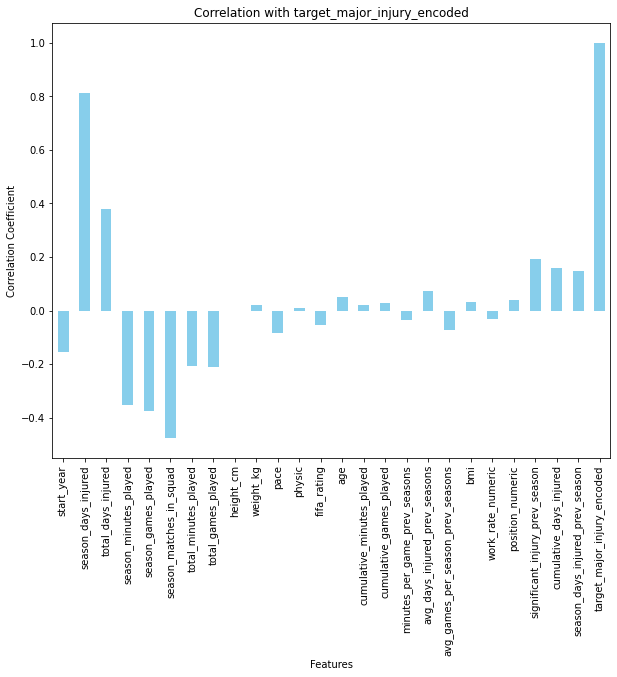

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['target_major_injury_encoded'] = label_encoder.fit_transform(df['target_major_injury'])
selected_feature = 'target_major_injury_encoded'
correlations = df.corrwith(df[selected_feature])

positive_correlations = correlations[correlations > 0]

positive_feature_names = positive_correlations.index.to_numpy()

# Plotting
plt.figure(figsize=(10, 8))
correlations.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {selected_feature}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [26]:
positive_correlations

season_days_injured                0.811022
total_days_injured                 0.378538
weight_kg                          0.019129
physic                             0.011302
age                                0.051705
cumulative_minutes_played          0.021058
cumulative_games_played            0.027408
avg_days_injured_prev_seasons      0.072810
bmi                                0.032143
position_numeric                   0.037610
significant_injury_prev_season     0.193772
cumulative_days_injured            0.157246
season_days_injured_prev_season    0.147224
target_major_injury_encoded        1.000000
dtype: float64

In [27]:
positive_feature_names

array(['season_days_injured', 'total_days_injured', 'weight_kg', 'physic',
       'age', 'cumulative_minutes_played', 'cumulative_games_played',
       'avg_days_injured_prev_seasons', 'bmi', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season', 'target_major_injury_encoded'],
      dtype=object)

In [28]:
#Dataset for Y as a categorical variable
df_model_cat = df[['p_id2', 'start_year', 'height_cm', 'weight_kg', 'work_rate_numeric', 'pace',
       'physic', 'position_numeric', 'age', 'cumulative_minutes_played','minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'significant_injury_prev_season', 'cumulative_days_injured',
               'target_major_injury' ]]


In [29]:
print('Total rows:', df_model_cat.shape[0])

Total rows: 685


In [30]:
import pandas as pd

# Assuming df_model_cat is your DataFrame
# Filter rows where 'target_major_injury' is 1 and 'position_numeric' is 1.0
filtered_df = df_model_cat[(df_model_cat['target_major_injury'] == 0) & (df_model_cat['position_numeric'] == 3.0)]



print("Filtered DataFrame:")


Filtered DataFrame:


In [31]:
filtered_df.describe()


,start_year,height_cm,weight_kg,work_rate_numeric,pace,physic,position_numeric,age,cumulative_minutes_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,significant_injury_prev_season,cumulative_days_injured
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.0,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2018.739884,179.320231,73.937476,3.491329,70.894316,70.042293,3.0,27.219653,3541.098266,71.746896,71.289474,0.184971,570.034682
std,1.087174,6.477940,6.136161,0.408749,9.873479,9.112917,0.0,3.430077,3219.448697,16.817255,63.440407,0.389401,814.386007
min,2016.000000,163.000000,61.333333,2.500000,46.333333,46.000000,3.0,19.000000,7.000000,7.000000,2.000000,0.000000,7.000000
25%,2018.000000,175.000000,70.000000,3.000000,62.833333,63.833333,3.0,25.000000,1544.000000,60.888889,26.000000,0.000000,163.000000
50%,2019.000000,179.500000,73.500000,3.500000,72.000000,73.166667,3.0,27.000000,2683.000000,75.034483,52.000000,0.000000,304.000000
75%,2020.000000,183.666667,77.833333,4.000000,78.333333,75.833333,3.0,30.000000,4824.000000,85.031746,99.500000,0.000000,654.000000
max,2020.000000,197.000000,90.333333,4.000000,89.000000,88.166667,3.0,37.000000,24172.000000,95.000000,337.000000,1.000000,6290.000000


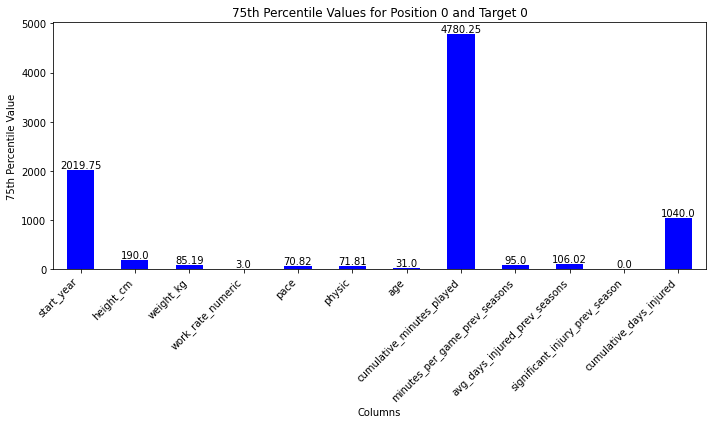

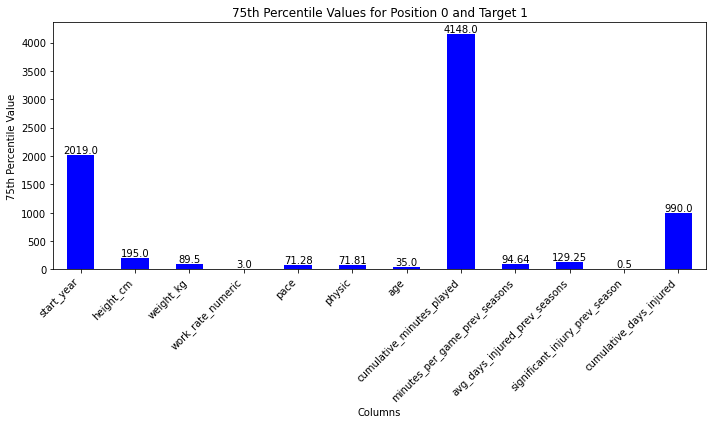

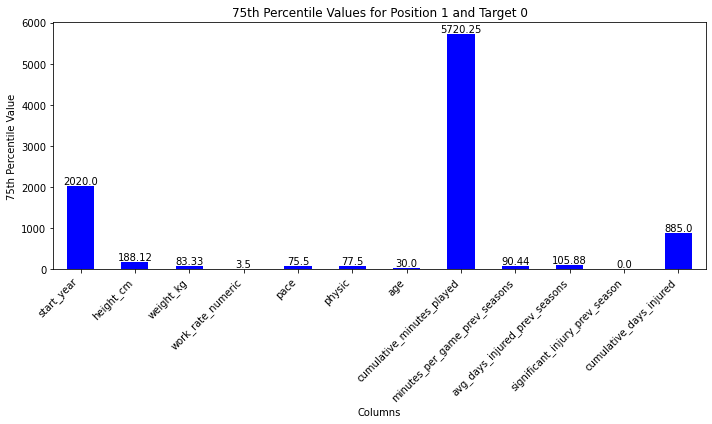

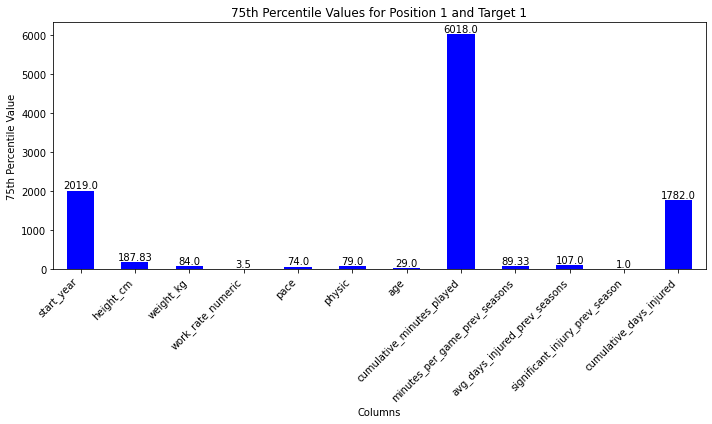

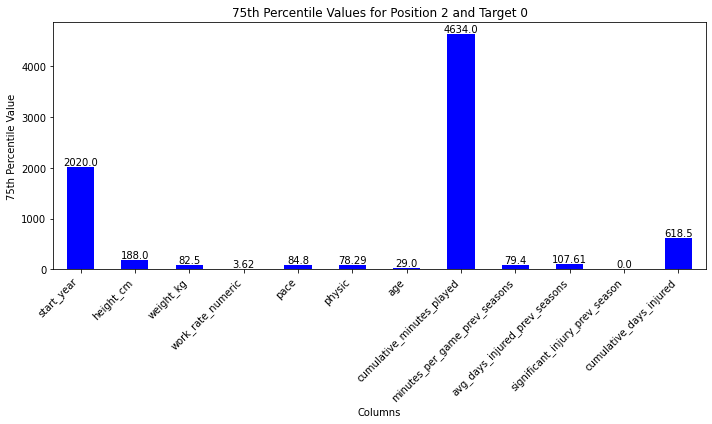

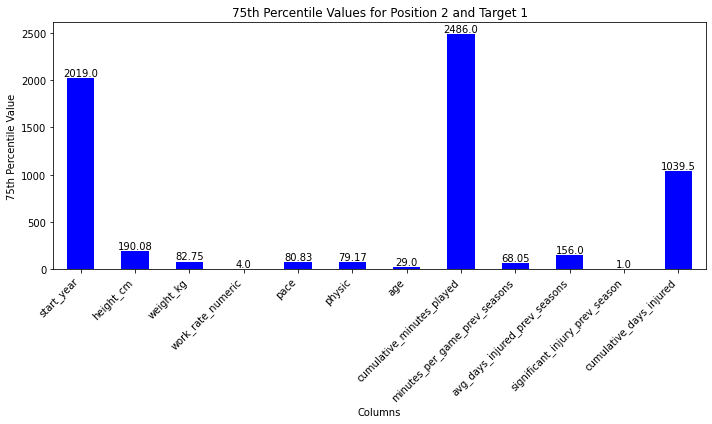

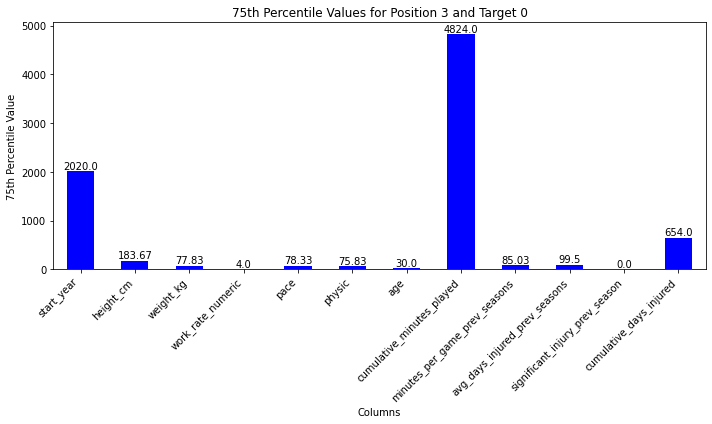

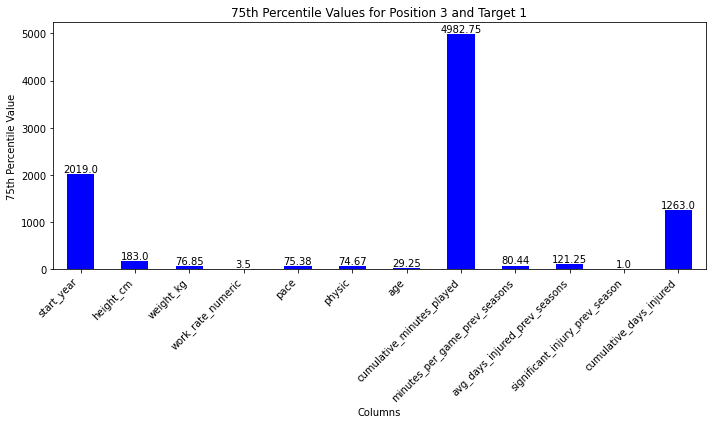

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_model_cat is your DataFrame

# Iterate through positions from 0 to 3
for position in range(4):
    for target_value in [0, 1]:
        # Filter rows where 'target_major_injury' matches the target_value and 'position_numeric' matches the current position
        filtered_df = df_model_cat[(df_model_cat['target_major_injury'] == target_value) & (df_model_cat['position_numeric'] == position)]

        # Generate descriptive statistics for the filtered DataFrame
        stats = filtered_df.describe()

        # Get the 75th percentile values for different columns
        percentile_75 = stats.loc['75%']

        # Exclude 'target_major_injury' and 'position_numeric' from plotting
        exclude_cols = ['target_major_injury', 'position_numeric']
        cols_to_plot = [col for col in percentile_75.index if col not in exclude_cols]

        # Plotting the 75th percentile values for different columns
        plt.figure(figsize=(10, 6))
        bars = percentile_75[cols_to_plot].plot(kind='bar', color='blue')
        plt.title(f"75th Percentile Values for Position {position} and Target {target_value}")
        plt.xlabel("Columns")
        plt.ylabel("75th Percentile Value")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Annotate each bar with its corresponding value
        for bar in bars.patches:
            yval = round(bar.get_height(), 2)
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, yval, ha='center', va='bottom')

        plt.show()


# train test split

In [33]:
from sklearn.model_selection import train_test_split

X = df_model_cat.drop(['target_major_injury', 'p_id2', 'start_year'], axis=1)
y = df_model_cat['target_major_injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
a = df_model_cat['target_major_injury']==0


In [35]:
row_values = df_model_cat.iloc[7, :].tolist()
print(row_values)

['aaronramsey', 2016, 181.0, 74.0, 4.0, 68.16666666666667, 74.66666666666667, 3.0, 26, 1329.0, 57.78260869565217, 122.0, 1.0, 436.0, True]


# to avoid Oversampling

In [36]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Convert non-numeric labels to numeric values (required for SMOTE)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
#pip install imbalanced-learn

# model selection

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn import svm

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score,  roc_auc_score


# import warnings

In [39]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=7),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
    
}

for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    #f1_score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"precision: {precision:.5f}")
    print(f"recall: {recall:.5f}")
    #print("F1 score: {:.2f}%".format(f1_score*100))
    print(f"roc_auc: {roc_auc:.5f}")
    print('***********************************')
    
    print(f"Classification Report:\n{report}\n")
    

C:\python3.10.1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.64563
precision: 0.23188
recall: 0.44444
roc_auc: 0.56634
***********************************
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       170
         1.0       0.23      0.44      0.30        36

    accuracy                           0.65       206
   macro avg       0.54      0.57      0.53       206
weighted avg       0.75      0.65      0.68       206


Model: K-Nearest Neighbors
Accuracy: 0.65049
precision: 0.26316
recall: 0.55556
roc_auc: 0.61307
***********************************
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76       170
         1.0       0.26      0.56      0.36        36

    accuracy                           0.65       206
   macro avg       0.57      0.61      0.56       206
weighted avg       0.77      0.65      0.69       206


Model: Decision Tree Classifier


In [40]:
'''

results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", " roc_auc"])

for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)


    results_df = results_df.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall" : recall,
        "F1 Score" : f1,
        "ROC AUC" : roc_auc
    }, ignore_index=True)

print(results_df)

'''

'\n\nresults_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", " roc_auc"])\n\nfor model_name, model in classification_models.items():\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n\n    accuracy = accuracy_score(y_test, y_pred)\n    precision = precision_score(y_test, y_pred)\n    recall = recall_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred)\n    roc_auc = roc_auc_score(y_test, y_pred)\n\n\n    results_df = results_df.append({\n        "Model": model_name,\n        "Accuracy": accuracy,\n        "Precision": precision,\n        "Recall" : recall,\n        "F1 Score" : f1,\n        "ROC AUC" : roc_auc\n    }, ignore_index=True)\n\nprint(results_df)\n\n'

In [41]:

'''
xgb_clf = xgb.XGBClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False
)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train, eval_metric='auc')

# Make predictions on the test set
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC score:", roc_auc)

'''

'\nxgb_clf = xgb.XGBClassifier(\n    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False\n)\n\n# Fit the model to the training data\nxgb_clf.fit(X_train, y_train, eval_metric=\'auc\')\n\n# Make predictions on the test set\ny_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]\n\n# Compute ROC AUC score\nroc_auc = roc_auc_score(y_test, y_pred_proba)\nprint("ROC AUC score:", roc_auc)\n\n'

# hyperparameter tunning


1] for xgboost classifier

In [42]:

xgb_model = XGBClassifier()
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")



Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.73301


In [43]:

best_params = grid_search.best_params_
final_xgb_clf = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False)
final_xgb_clf.fit(X_train, y_train, eval_metric='auc')

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)


Final ROC AUC score: 0.6702614379084968


C:\python3.10.1\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\python3.10.1\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [44]:
# CV

k = 5
cv_result = cross_val_score(xgb_model,X,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)


CV Scores:  [0.80291971 0.68613139 0.72262774 0.80291971 0.79562044]
CV scores average:  0.762043795620438


2] decision tree classifier

In [45]:
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    dt_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.63592


In [46]:
best_params = grid_search.best_params_
final_xgb_clf = DecisionTreeClassifier(**best_params, random_state=42)
final_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)

Final ROC AUC score: 0.5718954248366014


In [47]:
k = 5
cv_result = cross_val_score(dt_classifier,X,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.73722628 0.54744526 0.62773723 0.70072993 0.69343066]
CV scores average:  0.6613138686131388


3] k nearest neighbour

In [48]:
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the values based on your problem
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    knn_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.66019


In [49]:
best_params = grid_search.best_params_
final_xgb_clf = KNeighborsClassifier(**best_params)
final_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)

Final ROC AUC score: 0.7011437908496732


In [50]:
X_test.columns

Index(['height_cm', 'weight_kg', 'work_rate_numeric', 'pace', 'physic',
       'position_numeric', 'age', 'cumulative_minutes_played',
       'minutes_per_game_prev_seasons', 'avg_days_injured_prev_seasons',
       'significant_injury_prev_season', 'cumulative_days_injured'],
      dtype='object')

In [51]:
k = 5
cv_result = cross_val_score(knn_model,X,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.72992701 0.73722628 0.77372263 0.76642336 0.72262774]
CV scores average:  0.745985401459854


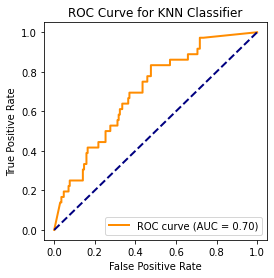

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification



# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(**best_params)
knn_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probabilities = knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.70


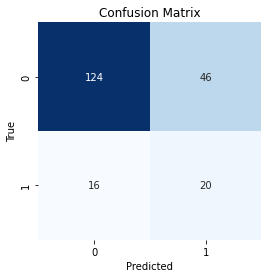

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


4] svm

In [54]:
'''
from sklearn import svm
svm_model = svm.SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")
'''

'\nfrom sklearn import svm\nsvm_model = svm.SVC()\n\n# Define the hyperparameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [\'scale\', \'auto\', 0.1, 0.01, 0.001],\n    \'degree\': [2, 3, 4],\n    \'class_weight\': [None, \'balanced\']\n}\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(\n    svm_model,\n    param_grid=param_grid,\n    scoring=\'accuracy\',\n    cv=5,\n    n_jobs=-1\n)\n\n# Fit the model to the training data with grid search\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\n\n# Use the best model to make predictions\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\n\n# Evaluate the best model\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Best Hyperparameters: {best_params}")\nprint(f"Accuracy: {accuracy:.5f}")\n'

In [55]:
'''
best_params = grid_search.best_params_
final_xgb_clf = svm.SVC(**best_params)
final_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)
'''

'\nbest_params = grid_search.best_params_\nfinal_xgb_clf = svm.SVC(**best_params)\nfinal_xgb_clf.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]\n\n# Compute ROC AUC score\nroc_auc_final = roc_auc_score(y_test, y_pred_proba_final)\nprint("Final ROC AUC score:", roc_auc_final)\n'

In [56]:
'''
k = 5
cv_result = cross_val_score(svm_model,X,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)
'''

"\nk = 5\ncv_result = cross_val_score(svm_model,X,y,cv=k)\nprint('CV Scores: ',cv_result)\nprint('CV scores average: ',np.sum(cv_result)/k)\n"

5] random forest classifier

In [57]:
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")

# Print additional metrics or reports as needed
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.73301


In [58]:
best_params = grid_search.best_params_
final_xgb_clf = RandomForestClassifier(**best_params)
final_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)

Final ROC AUC score: 0.6218954248366013


In [59]:
k = 5
cv_result = cross_val_score(rf_model,X,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.81751825 0.72992701 0.76642336 0.75912409 0.77372263]
CV scores average:  0.7693430656934306


6] catboost model

In [60]:
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    catboost_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.5f}")

0:	learn: 0.6414715	total: 13.5ms	remaining: 2.69s
1:	learn: 0.5897174	total: 19.3ms	remaining: 1.91s
2:	learn: 0.5576135	total: 26ms	remaining: 1.71s
3:	learn: 0.5245553	total: 31.1ms	remaining: 1.52s
4:	learn: 0.5048667	total: 37.9ms	remaining: 1.48s
5:	learn: 0.4821132	total: 44.4ms	remaining: 1.44s
6:	learn: 0.4666344	total: 50.1ms	remaining: 1.38s
7:	learn: 0.4432706	total: 56.8ms	remaining: 1.36s
8:	learn: 0.4241402	total: 62.1ms	remaining: 1.32s
9:	learn: 0.4094466	total: 68.2ms	remaining: 1.29s
10:	learn: 0.3947041	total: 74.2ms	remaining: 1.27s
11:	learn: 0.3851821	total: 80.1ms	remaining: 1.25s
12:	learn: 0.3680709	total: 86.2ms	remaining: 1.24s
13:	learn: 0.3546043	total: 91.9ms	remaining: 1.22s
14:	learn: 0.3382709	total: 100ms	remaining: 1.24s
15:	learn: 0.3250368	total: 107ms	remaining: 1.23s
16:	learn: 0.3155018	total: 113ms	remaining: 1.21s
17:	learn: 0.3073458	total: 119ms	remaining: 1.2s
18:	learn: 0.2938923	total: 125ms	remaining: 1.19s
19:	learn: 0.2828936	total: 13

162:	learn: 0.0240804	total: 1.32s	remaining: 300ms
163:	learn: 0.0237671	total: 1.33s	remaining: 293ms
164:	learn: 0.0234275	total: 1.34s	remaining: 285ms
165:	learn: 0.0232144	total: 1.36s	remaining: 278ms
166:	learn: 0.0230025	total: 1.37s	remaining: 270ms
167:	learn: 0.0226928	total: 1.38s	remaining: 263ms
168:	learn: 0.0224321	total: 1.39s	remaining: 255ms
169:	learn: 0.0222711	total: 1.4s	remaining: 247ms
170:	learn: 0.0220986	total: 1.41s	remaining: 238ms
171:	learn: 0.0218689	total: 1.41s	remaining: 230ms
172:	learn: 0.0216301	total: 1.42s	remaining: 222ms
173:	learn: 0.0213753	total: 1.43s	remaining: 213ms
174:	learn: 0.0212349	total: 1.44s	remaining: 206ms
175:	learn: 0.0210194	total: 1.45s	remaining: 198ms
176:	learn: 0.0208696	total: 1.46s	remaining: 190ms
177:	learn: 0.0206171	total: 1.47s	remaining: 182ms
178:	learn: 0.0204191	total: 1.48s	remaining: 174ms
179:	learn: 0.0202548	total: 1.49s	remaining: 166ms
180:	learn: 0.0201063	total: 1.51s	remaining: 158ms
181:	learn: 0

In [61]:
best_params = grid_search.best_params_
final_xgb_clf = CatBoostClassifier(**best_params)
final_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba_final = final_xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
print("Final ROC AUC score:", roc_auc_final)

0:	learn: 0.6414715	total: 11.3ms	remaining: 2.24s
1:	learn: 0.5897174	total: 20.7ms	remaining: 2.05s
2:	learn: 0.5576135	total: 30.7ms	remaining: 2.02s
3:	learn: 0.5245553	total: 40ms	remaining: 1.96s
4:	learn: 0.5048667	total: 49ms	remaining: 1.91s
5:	learn: 0.4821132	total: 59.6ms	remaining: 1.93s
6:	learn: 0.4666344	total: 71.2ms	remaining: 1.96s
7:	learn: 0.4432706	total: 81.5ms	remaining: 1.95s
8:	learn: 0.4241402	total: 91.2ms	remaining: 1.94s
9:	learn: 0.4094466	total: 97.5ms	remaining: 1.85s
10:	learn: 0.3947041	total: 105ms	remaining: 1.8s
11:	learn: 0.3851821	total: 113ms	remaining: 1.76s
12:	learn: 0.3680709	total: 122ms	remaining: 1.75s
13:	learn: 0.3546043	total: 129ms	remaining: 1.71s
14:	learn: 0.3382709	total: 139ms	remaining: 1.71s
15:	learn: 0.3250368	total: 148ms	remaining: 1.7s
16:	learn: 0.3155018	total: 161ms	remaining: 1.73s
17:	learn: 0.3073458	total: 169ms	remaining: 1.71s
18:	learn: 0.2938923	total: 181ms	remaining: 1.72s
19:	learn: 0.2828936	total: 190ms	rem

172:	learn: 0.0216301	total: 1.43s	remaining: 223ms
173:	learn: 0.0213753	total: 1.44s	remaining: 215ms
174:	learn: 0.0212349	total: 1.44s	remaining: 206ms
175:	learn: 0.0210194	total: 1.45s	remaining: 198ms
176:	learn: 0.0208696	total: 1.46s	remaining: 190ms
177:	learn: 0.0206171	total: 1.47s	remaining: 181ms
178:	learn: 0.0204191	total: 1.48s	remaining: 173ms
179:	learn: 0.0202548	total: 1.48s	remaining: 165ms
180:	learn: 0.0201063	total: 1.49s	remaining: 157ms
181:	learn: 0.0199230	total: 1.5s	remaining: 148ms
182:	learn: 0.0197581	total: 1.5s	remaining: 140ms
183:	learn: 0.0195965	total: 1.51s	remaining: 132ms
184:	learn: 0.0194618	total: 1.52s	remaining: 123ms
185:	learn: 0.0193134	total: 1.53s	remaining: 115ms
186:	learn: 0.0192015	total: 1.53s	remaining: 107ms
187:	learn: 0.0190908	total: 1.54s	remaining: 98.4ms
188:	learn: 0.0189770	total: 1.55s	remaining: 90.1ms
189:	learn: 0.0189328	total: 1.55s	remaining: 81.8ms
190:	learn: 0.0187787	total: 1.56s	remaining: 73.6ms
191:	learn

In [62]:
X_train.columns

Index(['height_cm', 'weight_kg', 'work_rate_numeric', 'pace', 'physic',
       'position_numeric', 'age', 'cumulative_minutes_played',
       'minutes_per_game_prev_seasons', 'avg_days_injured_prev_seasons',
       'significant_injury_prev_season', 'cumulative_days_injured'],
      dtype='object')

# roc curve

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier(colsample_bytree = 1.0, gamma=0.2, learning_rate= 0.2, max_depth= 5, min_child_weight= 1, n_estimators= 100, scale_pos_weight=1, subsample= 0.8)
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs)


# Create and fit the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7, weights= 'distance')
knn_model.fit(X_train, y_train)
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 5)
dt_model.fit(X_train, y_train)
dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)

# Create and fit the random forest model
rf_model = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)

# Create and fit the CatBoost model
catboost_model = CatBoostClassifier(border_count= 128, depth= 8, iterations=200, l2_leaf_reg= 3, learning_rate= 0.1)
catboost_model.fit(X_train, y_train)
catboost_probs = catboost_model.predict_proba(X_test)[:, 1]
catboost_auc = roc_auc_score(y_test, catboost_probs)

# Continue with the existing code for CatBoost, Random Forest, and plotting ROC curves

# Print AUC scores for all models
print(f"CatBoost AUC: {catboost_auc:.5f}")
print(f"KNN AUC: {knn_auc:.5f}")
#print(f"XGBoost AUC: {xgb_auc:.5f}")
print(f"Decision Tree AUC: {dt_auc:.5f}")
print(f"Random Forest AUC: {rf_auc:.5f}")

# Continue with the existing code for plotting ROC curves


0:	learn: 0.6414715	total: 7.62ms	remaining: 1.51s
1:	learn: 0.5897174	total: 16ms	remaining: 1.58s
2:	learn: 0.5576135	total: 23.4ms	remaining: 1.53s
3:	learn: 0.5245553	total: 30.4ms	remaining: 1.49s
4:	learn: 0.5048667	total: 38.4ms	remaining: 1.5s
5:	learn: 0.4821132	total: 46.5ms	remaining: 1.5s
6:	learn: 0.4666344	total: 51.5ms	remaining: 1.42s
7:	learn: 0.4432706	total: 57.1ms	remaining: 1.37s
8:	learn: 0.4241402	total: 63.1ms	remaining: 1.34s
9:	learn: 0.4094466	total: 69ms	remaining: 1.31s
10:	learn: 0.3947041	total: 75.4ms	remaining: 1.29s
11:	learn: 0.3851821	total: 81.1ms	remaining: 1.27s
12:	learn: 0.3680709	total: 86.3ms	remaining: 1.24s
13:	learn: 0.3546043	total: 93ms	remaining: 1.24s
14:	learn: 0.3382709	total: 98.1ms	remaining: 1.21s
15:	learn: 0.3250368	total: 105ms	remaining: 1.2s
16:	learn: 0.3155018	total: 111ms	remaining: 1.19s
17:	learn: 0.3073458	total: 116ms	remaining: 1.17s
18:	learn: 0.2938923	total: 122ms	remaining: 1.16s
19:	learn: 0.2828936	total: 127ms	r

160:	learn: 0.0246278	total: 1.1s	remaining: 267ms
161:	learn: 0.0243551	total: 1.15s	remaining: 269ms
162:	learn: 0.0240804	total: 1.17s	remaining: 265ms
163:	learn: 0.0237671	total: 1.18s	remaining: 259ms
164:	learn: 0.0234275	total: 1.19s	remaining: 251ms
165:	learn: 0.0232144	total: 1.2s	remaining: 245ms
166:	learn: 0.0230025	total: 1.2s	remaining: 238ms
167:	learn: 0.0226928	total: 1.21s	remaining: 231ms
168:	learn: 0.0224321	total: 1.22s	remaining: 224ms
169:	learn: 0.0222711	total: 1.23s	remaining: 217ms
170:	learn: 0.0220986	total: 1.24s	remaining: 210ms
171:	learn: 0.0218689	total: 1.25s	remaining: 203ms
172:	learn: 0.0216301	total: 1.25s	remaining: 196ms
173:	learn: 0.0213753	total: 1.26s	remaining: 189ms
174:	learn: 0.0212349	total: 1.27s	remaining: 181ms
175:	learn: 0.0210194	total: 1.27s	remaining: 174ms
176:	learn: 0.0208696	total: 1.28s	remaining: 167ms
177:	learn: 0.0206171	total: 1.29s	remaining: 159ms
178:	learn: 0.0204191	total: 1.3s	remaining: 152ms
179:	learn: 0.02

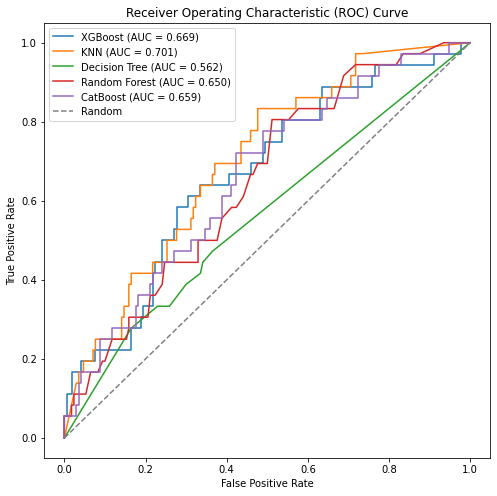

In [64]:
# from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have xgb_probs, knn_probs, dt_probs, rf_probs, catboost_probs already calculated

# Create an ROC curve for each classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, catboost_probs)

# Calculate AUC for each classifier
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_catboost = auc(fpr_catboost, tpr_catboost)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.3f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [65]:
'''
import pickle

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Save the model to a file using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now, you can use the loaded_model for predictions

'''


"\nimport pickle\n\nmodel = KNeighborsClassifier()\nmodel.fit(X_train, y_train)\n\n# Save the model to a file using pickle\nwith open('knn_model.pkl', 'wb') as file:\n    pickle.dump(model, file)\n\n# Load the model from the file\nwith open('knn_model.pkl', 'rb') as file:\n    loaded_model = pickle.load(file)\n\n# Now, you can use the loaded_model for predictions\n\n"